In [1]:
from bs4 import BeautifulSoup
import requests
import os
# https://data.binance.vision/?prefix=data/spot/monthly/klines/
# https://github.com/binance/binance-public-data

In [6]:
url = "https://data.binance.vision/?prefix=data/spot/monthly/klines/1INCHBTC/1m/"

with open("/home/ema/dev/shocks/data/binance_pairs.html") as file:
    soup = BeautifulSoup(file)

In [7]:
pairs = []
for pair in soup.find_all("a")[1: ]:
    pairs.append(pair.text.replace("/", ""))

def download_data(data_path, pair, months, freq="1m"):
    for month in months:
        pair_dir = os.path.join(DATA_PATH, pair)
        if not os.path.isdir(pair_dir):
            os.mkdir(pair_dir)

        url = f"https://data.binance.vision/data/spot/monthly/klines/{pair}/{freq}/{pair}-{freq}-{month}.zip"
        os.system(f" cd {pair_dir} && wget {url}")
 

In [44]:
months = [
    "2021-10",
    "2021-11",
    "2021-12",
    "2022-01",
    "2022-02",
    "2022-03",
]

freq = "1m"
DATA_PATH ="/home/ema/dev/shocks/shocks/data/binance/"
selected_pairs = ("BTCUSDT", "BNBBTC", "AVAXBTC", "JOEBTC", "AXSTRY", "CAKEBRL")


for pair in selected_pairs:
    download_data(data_path=DATA_PATH, pair=pair, months=months, freq="1m")

NameError: name 'download_data' is not defined

In [64]:
%load_ext autoreload
%autoreload 2

In [77]:
from shocks.dataset import Dataset
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams["figure.figsize"] = (20,15)

data = Dataset(pair="AVAXBTC")
data.preprocess(freq="1h")

In [78]:
data.build_dataset()

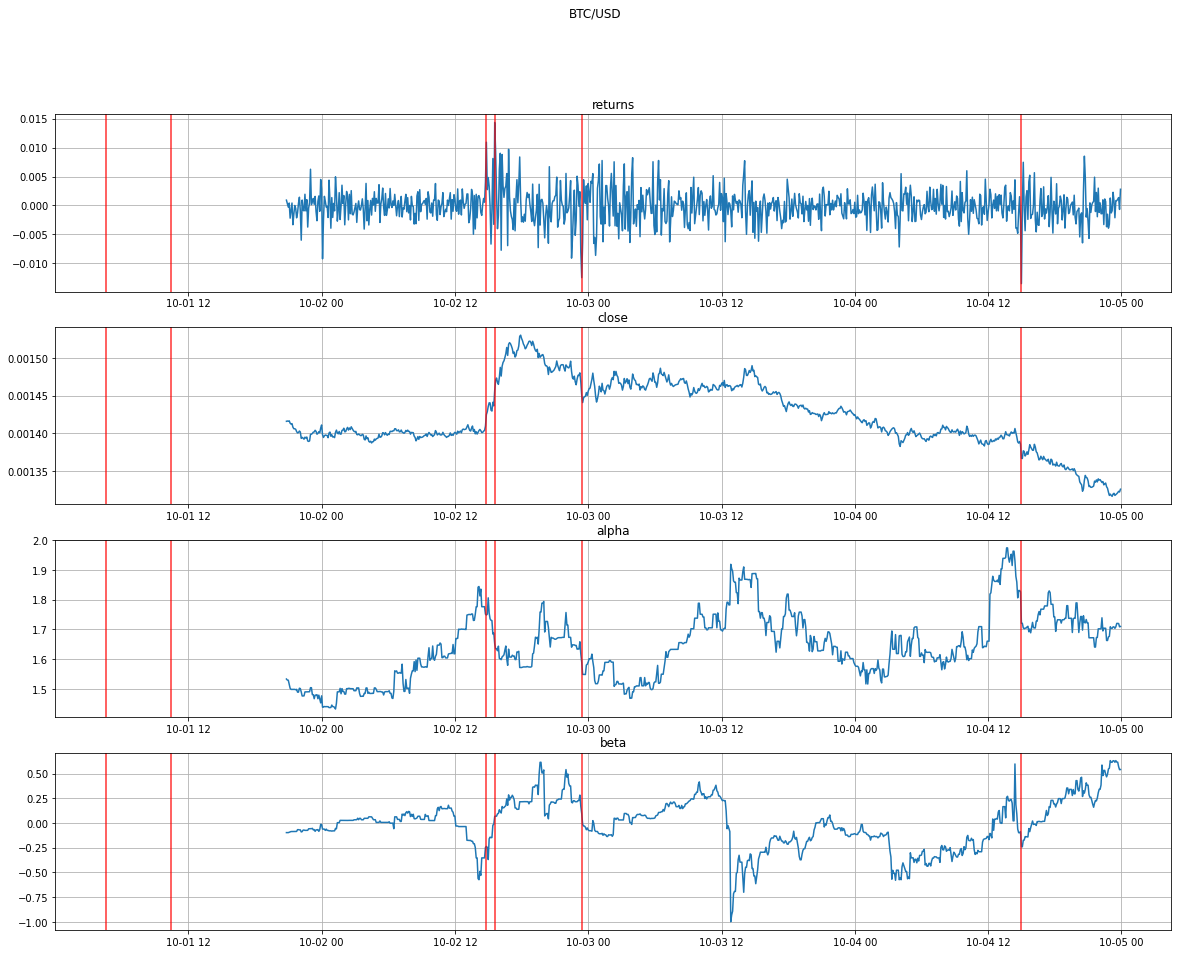

In [51]:
data.find_shocks(start_date="2021-10-01", end_date="2021-10-3", plot=False, std_from_mean=3.5)
data.fit(window=250, start_date="2021-10-01", end_date="2021-10-3")
data.plot_fit(data.fitted, data.shocks)

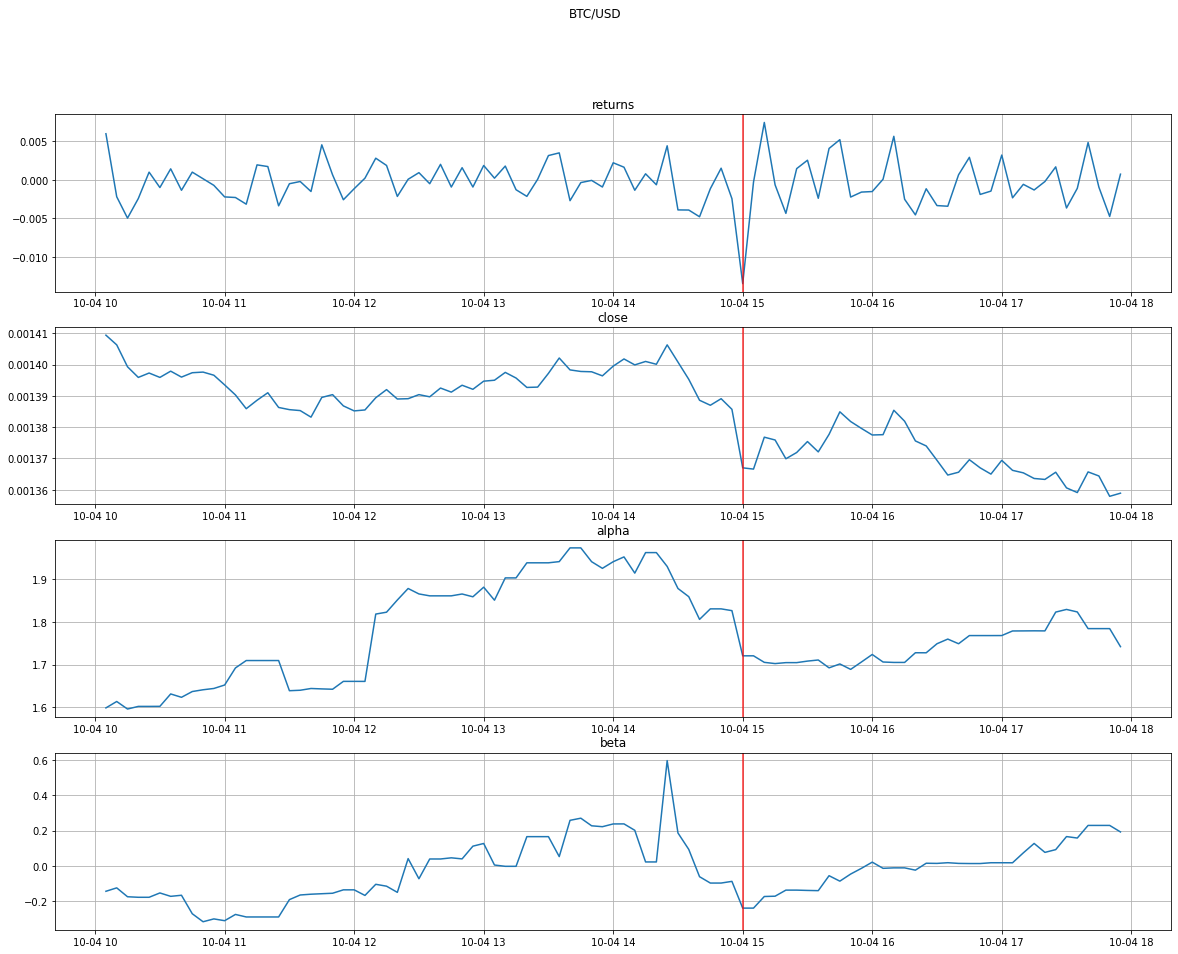

In [25]:
data.shocks[-1]
data.plot_fit(Dataset.filter_data(data.fitted, "2021-10-04 10:00:00", "2021-10-04 18:00:00"), [data.shocks[-1]])

In [37]:
(Dataset.filter_data(data.fitted, "2021-10-04 14:05:00", "2021-10-04 14:35:00")["alpha"].pct_change().mean(),
Dataset.filter_data(data.fitted, "2021-10-04 13:25:00", "2021-10-04 14:35:00")["alpha"].pct_change().mean(),
Dataset.filter_data(data.fitted, "2021-10-04 12:30:00", "2021-10-04 14:35:00")["alpha"].pct_change().mean(),
Dataset.filter_data(data.fitted, "2021-10-04 08:25:00", "2021-10-04 14:35:00")["alpha"].pct_change().mean(),
Dataset.filter_data(data.fitted, "2021-10-04 06:15:00", "2021-10-04 14:35:00")["alpha"].pct_change().mean()
)

(-0.004536268866320831,
 -0.0025101850982391185,
 0.0004935762545173689,
 0.0024197187699857787,
 0.001535328375315918)

In [54]:
data.data

,close,returns,log_returns
open time,,,
2021-10-01 00:00:00,0.001517,NaN,NaN
2021-10-01 00:05:00,0.001512,-0.003361,-0.003367
2021-10-01 00:10:00,0.001510,-0.001521,-0.001522
2021-10-01 00:15:00,0.001507,-0.002318,-0.002321
2021-10-01 00:20:00,0.001509,0.001726,0.001724
...,...,...,...
2022-03-31 23:35:00,0.002110,0.001804,0.001802
2022-03-31 23:40:00,0.002116,0.002464,0.002461
2022-03-31 23:45:00,0.002113,-0.001371,-0.001372


In [1]:
from itertools import product

cols = ("alpha", "beta", "close", "volume")
observations_before_shocks = (5, 10, 25, 50)
measures = ("mean", "std", "tot_pct_change")
operations = "pct_change"

l = list(product())